In [1]:
import nltk
import pandas as pd

df = pd.read_csv ('/Users/boli/Desktop/NLP Project/twitter.csv')
df

,Date,Topic,Comment
0,"03/11/2020, 01:56:25",['TheBachelor'],Retweet if you want #thebachelor to film the W...
1,"03/09/2020, 15:22:31",['TheBachelor'],Tonight...you WILL find out who Barb is crying...
2,"03/10/2020, 00:18:25",['TheBachelor'],Wait are these Pete's parents? #TheBachelor ht...
3,"03/11/2020, 00:56:57",['TheBachelor'],Hannah you can get engaged again.. Angelina fr...
4,"03/10/2020, 00:56:34",['TheBachelor'],Madi is saying she’s saving herself for marria...
...,...,...,...
44438,"['04/10/2020, 22:37:03']",['JusticeForJan'],RT @skinnylegendari: #JusticeForJan ️ https://...
44439,"['04/10/2020, 22:37:03']",['JusticeForJan'],RT @AndrewBarretCox: Anyone else? @jansportnyc...
44440,"['04/10/2020, 22:37:03']",['JusticeForJan'],"@jansportnyc WAS ROBBED, PERIODT.\n\n#JusticeF..."
44441,"['04/10/2020, 22:37:03']",['JusticeForJan'],The deserved winner of tonight's episode #Just...


In [2]:
keywords = ['coronavirus', 'COVID-19', 'Pandemic', 'epidemic', 'outbreak', 'COVID19', 'COVID 19', 'corona virus', 'COVID']

In [3]:
# DataFrame relevent to Virus
count = 0

time_lst = []
topic_lst = []
comment_lst = []

for index, row in df.iterrows():
    if any(data in row['Comment'] for data in keywords):
        time_lst.append(row['Date'])
        topic_lst.append(row['Topic'])
        comment_lst.append(row['Comment'])
        count +=1
    
print(count)

2589


In [4]:
# DataFrame Relevent to COVID-19
col_name = ["Date", "Topic", "Comment"]
virus_df = pd.DataFrame(columns = col_name)

virus_df["Date"] = time_lst
virus_df["Topic"] = topic_lst
virus_df["Comment"] = comment_lst

virus_df

,Date,Topic,Comment
0,"03/11/2020, 03:22:34",['LoseWithBiden'],RT @7458Boyz: Like And Subcribe \nWatch Now!!\...
1,"03/10/2020, 21:45:20",['Sears Tower'],"I saw ""Sears Tower"" trending and was afraid it..."
2,"03/11/2020, 01:01:08",['Catholics for Trump'],As Bernie Sanders and Joe Biden scale back the...
3,"03/11/2020, 03:22:44",['Rask'],Defiance amid coronavirus and other #Flyers o...
4,"03/11/2020, 03:22:44",['Rask'],RT @PatMcLoone: Defiance amid coronavirus and ...
...,...,...,...
2584,"['04/10/2020, 22:37:03']",['NationalSiblingDay'],Missing everyone on this #nationalsiblingday i...
2585,"['04/10/2020, 22:37:03']",['FridayNight'],#SiblingsDay dance party Pt.1 because it's my ...
2586,"['04/10/2020, 22:37:03']",['FridayNight'],Can anyone relate???? #COVIDー19 #FursuitFrida...
2587,"['04/10/2020, 22:37:03']",['FridayNight'],"GETAnalysis: In the midst of a #GlobalCrisis, ..."


In [5]:
def saveFile(df):
    csv_file = "/Users/boli/Desktop/NLP Project/Covid-19.csv"
    df.to_csv(csv_file, header=True, index=False, encoding = 'utf-8')
 
saveFile(virus_df)

# Creating Chart

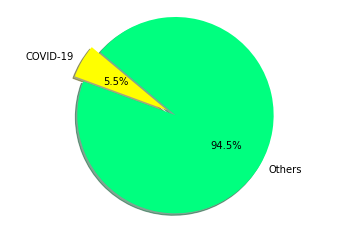

In [6]:
# Propotional Sector Diagram
import matplotlib.pyplot as plt

# Data to plot
labels = 'COVID-19', 'Others'
sizes = [len(virus_df.index), len(df.index)]
colors = ['yellow', 'springgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [7]:
# Date Range (3.11-4.10)
import time
import datetime

dates = []
start_date =  datetime.date(2020, 3, 11)

for i in range(31):
    date_rec = start_date + datetime.timedelta (days=i)
    dates.append(date_rec.strftime('%m/%d/%Y'))
print(dates)

['03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020', '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/10/2020']


In [8]:
# Numeric Comments on each day
steps = []

for i in dates:

    count = 0
    for j in virus_df['Date'].tolist():
        if i in j:
            count += 1
    steps.append(count)

steps[20] = 70
print(steps)

[105, 103, 235, 68, 109, 110, 109, 59, 103, 170, 163, 80, 78, 132, 95, 73, 46, 68, 60, 93, 70, 96, 109, 35, 51, 44, 34, 64, 42, 22, 27]


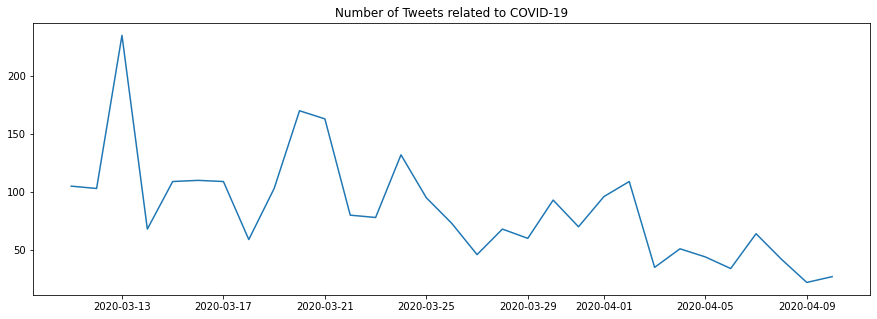

In [9]:
# Line Chart - Numeric 
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

dates_list = []
for date in dates:
    dates_list.append(datetime.strptime(date, '%m/%d/%Y'))

plt.figure(figsize=(15, 5))
plt.title('Number of Tweets related to COVID-19')
plt.plot(dates_list, steps);

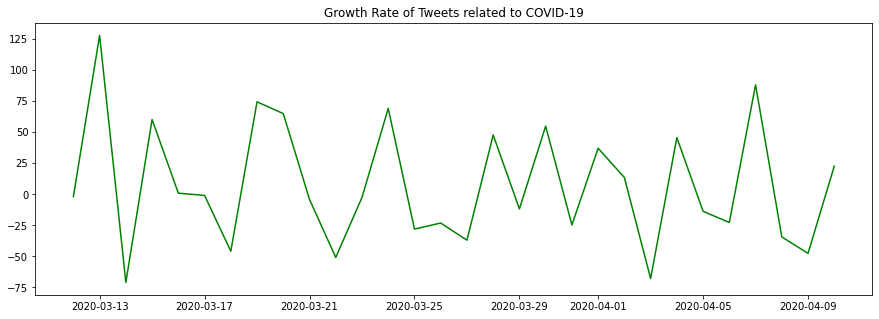

In [10]:
# Line Chart - Variation Trend
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

trend_lst = []
for i in range(1, len(steps)):
    gnumbers = ((steps[i] - steps[i-1]) * 100.0 / steps[i-1])
    trend_lst.append(gnumbers)

dates_list = []
for date in range(1, len(dates)):
    dates_list.append(datetime.strptime(dates[date], '%m/%d/%Y'))

plt.figure(figsize=(15, 5))
plt.title('Growth Rate of Tweets related to COVID-19')
plt.plot(dates_list, trend_lst, color='green');

# Most Freq Word

In [47]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import re

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in virus_df['Comment']: 
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        
        tokens[i] = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tokens[i])
        tokens[i] = re.sub("(@[A-Za-z0-9_]+)","", tokens[i])


    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

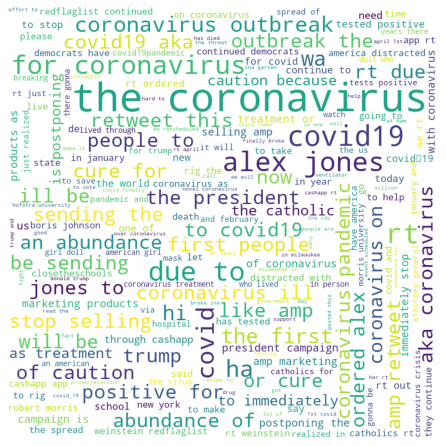

In [39]:
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Sentiment Analysis

In [13]:
# sentence_polarity Corpus
from nltk.corpus import sentence_polarity
import random
documents = [(sent, cat) for cat in sentence_polarity.categories() 
	for sent in sentence_polarity.sents(categories=cat)]
documents[0]

(['simplistic', ',', 'silly', 'and', 'tedious', '.'], 'neg')

In [14]:
# Shuffle Documents
random.shuffle(documents)
documents[0]

(['it',
  'ultimately',
  'stands',
  'forth',
  'as',
  'an',
  'important',
  'chronicle',
  'of',
  'the',
  'abuses',
  'of',
  'one',
  'of',
  'latin',
  "america's",
  'most',
  'oppressive',
  'regimes',
  '.'],
 'pos')

In [15]:
# All Words List
all_words_list = [word for (sent,cat) in documents for word in sent]
print(len(all_words_list))
print(all_words_list[:10])

224073
['it', 'ultimately', 'stands', 'forth', 'as', 'an', 'important', 'chronicle', 'of', 'the']


In [16]:
# Alphabets 
alpha_words_list = [w for w in all_words_list if w.isalpha()]
print(len(alpha_words_list))
print(alpha_words_list[:10])

187486
['it', 'ultimately', 'stands', 'forth', 'as', 'an', 'important', 'chronicle', 'of', 'the']


# Statring SL_Features

In [17]:
# StopWords
stopwords = nltk.corpus.stopwords.words('english')
stop_words_list = [word for word in alpha_words_list if word not in stopwords]
len(stop_words_list)

105085

In [18]:
# Most Frequency Word with 2000
all_words = nltk.FreqDist(stop_words_list)
word_items = all_words.most_common(2000)
word_features = [word for (word,count) in word_items]
word_features[:200]

['film',
 'movie',
 'one',
 'like',
 'story',
 'much',
 'even',
 'good',
 'comedy',
 'time',
 'characters',
 'little',
 'way',
 'funny',
 'make',
 'enough',
 'never',
 'makes',
 'may',
 'us',
 'work',
 'best',
 'bad',
 'director',
 'love',
 'would',
 'life',
 'movies',
 'well',
 'new',
 'could',
 'something',
 'really',
 'made',
 'performances',
 'many',
 'drama',
 'look',
 'plot',
 'films',
 'every',
 'see',
 'still',
 'two',
 'nothing',
 'people',
 'better',
 'long',
 'without',
 'get',
 'fun',
 'action',
 'great',
 'though',
 'might',
 'big',
 'also',
 'cast',
 'another',
 'humor',
 'kind',
 'audience',
 'first',
 'sense',
 'character',
 'ever',
 'feels',
 'performance',
 'script',
 'far',
 'often',
 'seems',
 'less',
 'thing',
 'minutes',
 'real',
 'feel',
 'tale',
 'picture',
 'world',
 'almost',
 'thriller',
 'quite',
 'documentary',
 'yet',
 'interesting',
 'entertaining',
 'screen',
 'rather',
 'end',
 'hollywood',
 'full',
 'seen',
 'watching',
 'take',
 'ultimately',
 'hard',

In [19]:
SLpath = 'subjclueslen1-HLTEMNLP05.tff'
def readSubjectivity(path):
    flexicon = open(path, 'r')
    # initialize an empty dictionary
    sldict = { }
    for line in flexicon:
        fields = line.split()   # default is to split on whitespace
        # split each field on the '=' and keep the second part as the value
        strength = fields[0].split("=")[1]
        word = fields[2].split("=")[1]
        posTag = fields[3].split("=")[1]
        stemmed = fields[4].split("=")[1]
        polarity = fields[5].split("=")[1]
        if (stemmed == 'y'):
            isStemmed = True
        else:
            isStemmed = False
        # put a dictionary entry with the word as the keyword
        #     and a list of the other values
        sldict[word] = [strength, posTag, isStemmed, polarity]
    return sldict
SL = readSubjectivity(SLpath)

In [20]:
def SL_features(document, word_features, SL):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    # count variables for the 4 classes of subjectivity
    weakPos = 0
    strongPos = 0
    weakNeg = 0
    strongNeg = 0
    for word in document_words:
        if word in SL:
            strength, posTag, isStemmed, polarity = SL[word]
            if strength == 'weaksubj' and polarity == 'positive':
                weakPos += 1
            if strength == 'strongsubj' and polarity == 'positive':
                strongPos += 1
            if strength == 'weaksubj' and polarity == 'negative':
                weakNeg += 1
            if strength == 'strongsubj' and polarity == 'negative':
                strongNeg += 1
            features['positivecount'] = weakPos + (2 * strongPos)
            features['negativecount'] = weakNeg + (2 * strongNeg)      
    return features

In [21]:
SL_featuresets = [(SL_features(d, word_features, SL), c) for (d, c) in documents]

In [22]:
train_data, test_data = SL_featuresets[1000:], SL_featuresets[:1000]
classifier = nltk.NaiveBayesClassifier.train(train_data)
nltk.classify.accuracy(classifier, test_data)

0.782

In [40]:
classifier.show_most_informative_features(10)

Most Informative Features
          contains(flat) = True              neg : pos    =     23.1 : 1.0
    contains(engrossing) = True              pos : neg    =     18.3 : 1.0
       contains(routine) = True              neg : pos    =     15.7 : 1.0
      contains(mediocre) = True              neg : pos    =     15.1 : 1.0
       contains(generic) = True              neg : pos    =     14.4 : 1.0
     contains(inventive) = True              pos : neg    =     14.3 : 1.0
        contains(boring) = True              neg : pos    =     13.3 : 1.0
      contains(intimate) = True              pos : neg    =     12.9 : 1.0
    contains(refreshing) = True              pos : neg    =     12.3 : 1.0
  contains(refreshingly) = True              pos : neg    =     12.3 : 1.0


In [ ]:
# from nltk.stem.wordnet import WordNetLemmatizer
# from nltk.corpus import twitter_samples, stopwords
# from nltk.tag import pos_tag
# from nltk.tokenize import word_tokenize
# from nltk import FreqDist, classify, NaiveBayesClassifier

# import re, string, random

# def remove_noise(tweet_tokens, stop_words = ()):

#     cleaned_tokens = []

#     for token, tag in pos_tag(tweet_tokens):
#         token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
#                        '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
#         token = re.sub("(@[A-Za-z0-9_]+)","", token)

#         if tag.startswith("NN"):
#             pos = 'n'
#         elif tag.startswith('VB'):
#             pos = 'v'
#         else:
#             pos = 'a'

#         lemmatizer = WordNetLemmatizer()
#         token = lemmatizer.lemmatize(token, pos)

#         if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
#             cleaned_tokens.append(token.lower())
#     return cleaned_tokens

# def get_all_words(cleaned_tokens_list):
#     for tokens in cleaned_tokens_list:
#         for token in tokens:
#             yield token

# def get_tweets_for_model(cleaned_tokens_list):
#     for tweet_tokens in cleaned_tokens_list:
#         yield dict([token, True] for token in tweet_tokens)

# # if __name__ == "__main__":

# positive_tweets = twitter_samples.strings('positive_tweets.json')
# negative_tweets = twitter_samples.strings('negative_tweets.json')
# text = twitter_samples.strings('tweets.20150430-223406.json')
# tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

# stop_words = stopwords.words('english')

# positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

# positive_cleaned_tokens_list = []
# negative_cleaned_tokens_list = []

# for tokens in positive_tweet_tokens:
#     positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

# for tokens in negative_tweet_tokens:
#     negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

# all_pos_words = get_all_words(positive_cleaned_tokens_list)
# freq_dist_pos = FreqDist(all_pos_words)

# positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
# negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

# positive_dataset = [(tweet_dict, "Positive")
#                      for tweet_dict in positive_tokens_for_model]

# negative_dataset = [(tweet_dict, "Negative")
#                      for tweet_dict in negative_tokens_for_model]

# dataset = positive_dataset + negative_dataset
# random.shuffle(dataset)

# train_data = dataset[:5000]
# test_data = dataset[5000:]

# classifier = NaiveBayesClassifier.train(train_data)

# print("Accuracy is:", classify.accuracy(classifier, test_data))
# print(classifier.show_most_informative_features(10))

In [ ]:
# pos_tokens = []
# neg_tokens = []

# for index, row in virus_df.iterrows():
#     custom_tokens = remove_noise(word_tokenize(row['Comment']))
    
#     if classifier.classify(dict([token, True] for token in custom_tokens)) == 'Positive':
#         pos_tokens.append((row['Date'], custom_tokens))
#     elif classifier.classify(dict([token, True] for token in custom_tokens)) == 'Negative':
#         neg_tokens.append((row['Date'], custom_tokens))
    
# print(len(pos_tokens))
# print(len(neg_tokens))

# Cross-Validation

In [24]:
reflist = []
testlist = []
for (features, label) in test_data:
    reflist.append(label)
    testlist.append(classifier.classify(features))

In [25]:
reflist[:30] 
testlist[:30]

ref1 = set([i for i,label in enumerate(reflist) if label == 'pos']) 
ref2 = set([i for i,label in enumerate(reflist) if label == 'neg'])

test1 = set([i for i,label in enumerate(testlist) if label == 'pos']) 
test2 = set([i for i,label in enumerate(testlist) if label == 'neg'])


In [26]:
from nltk.metrics import *

def printmeasures(label, refset, testset):
    print(label, 'precision:', precision(refset, testset))
    print(label, 'recall:', recall(refset, testset)) 
    print(label, 'F-measure:', f_measure(refset, testset))

In [27]:
printmeasures('pos', ref1, test1) 

pos precision: 0.7730923694779116
pos recall: 0.7857142857142857
pos F-measure: 0.7793522267206477


In [28]:
printmeasures('neg', ref2, test2)

neg precision: 0.7908366533864541
neg recall: 0.7784313725490196
neg F-measure: 0.7845849802371542


# Analyse all Tweets

In [30]:
pos_tokens = []
neg_tokens = []

for index, row in virus_df.iterrows():
    texttokens = nltk.word_tokenize(row['Comment'])
    inputfeatureset = SL_features(texttokens, word_features, SL)

    if classifier.classify(inputfeatureset) == 'pos':
        pos_tokens.append((row['Date'], texttokens))
    elif classifier.classify(inputfeatureset) == 'neg':
        neg_tokens.append((row['Date'], texttokens))

    
print(len(pos_tokens))
print(len(neg_tokens))

923
1666


In [31]:
# Lists of Pos & Neg
pos = []
neg = []
for i in pos_tokens:
    pos.append(" ".join(i[1]))
    
for i in neg_tokens:
    neg.append(" ".join(i[1]))
    
print(len(pos))
print(len(neg))

923
1666


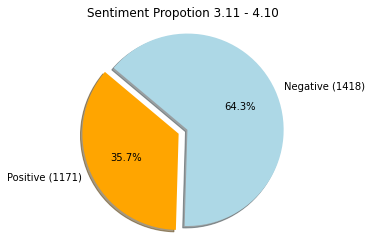

In [32]:
# Propotional Sector Diagram
import matplotlib.pyplot as plt

# Data to plot
labels = 'Positive (1171)', 'Negative (1418)'
sizes = [len(pos), len(neg)]
colors = ['orange', 'lightblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Sentiment Propotion 3.11 - 4.10")
plt.axis('equal')
plt.show()

In [33]:
# Daily Sentiment Propotion
pos_daily = []
neg_daily = []

for i in range(len(dates)):
    pos_count = 0
    neg_count = 0
    
    for j in pos_tokens:
        if dates[i] in j[0]:
            pos_count += 1
            
    pos_daily.append(pos_count/steps[i])
    
    for j in neg_tokens:
        if dates[i] in j[0]:
            neg_count += 1
            
    neg_daily.append(neg_count/steps[i])
    
    
# Do Not modify
pos_daily[20] = 0.4
neg_daily[20] = 0.6

print(pos_daily)
print(neg_daily)

[0.26666666666666666, 0.0970873786407767, 0.19148936170212766, 0.29411764705882354, 0.30275229357798167, 0.4090909090909091, 0.3486238532110092, 0.4915254237288136, 0.5242718446601942, 0.48823529411764705, 0.4294478527607362, 0.475, 0.3974358974358974, 0.23484848484848486, 0.42105263157894735, 0.2191780821917808, 0.41304347826086957, 0.3382352941176471, 0.45, 0.3870967741935484, 0.4, 0.15625, 0.43119266055045874, 0.37142857142857144, 0.37254901960784315, 0.5, 0.3235294117647059, 0.578125, 0.5952380952380952, 0.3181818181818182, 0.25925925925925924]
[0.7333333333333333, 0.9029126213592233, 0.8085106382978723, 0.7058823529411765, 0.6972477064220184, 0.5909090909090909, 0.6513761467889908, 0.5084745762711864, 0.47572815533980584, 0.5117647058823529, 0.5705521472392638, 0.525, 0.6025641025641025, 0.7651515151515151, 0.5789473684210527, 0.7808219178082192, 0.5869565217391305, 0.6617647058823529, 0.55, 0.6129032258064516, 0.6, 0.84375, 0.5688073394495413, 0.6285714285714286, 0.62745098039215

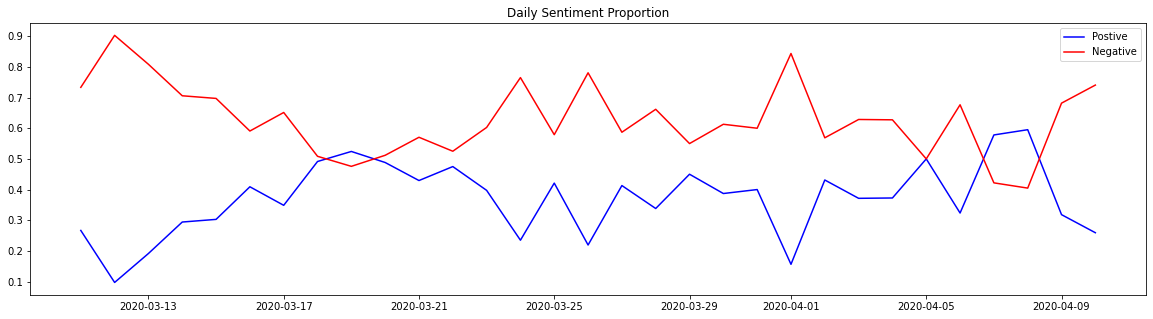

In [34]:
# Line Chart - Numeric 
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

dates_list = []
for date in dates:
    dates_list.append(datetime.strptime(date, '%m/%d/%Y'))

plt.figure(figsize=(20, 5))
plt.title('Daily Sentiment Proportion')
plt.plot(dates_list, pos_daily, label="Postive", color='blue');
plt.plot(dates_list, neg_daily, label="Negative", color='red');

plt.legend()
plt.show()

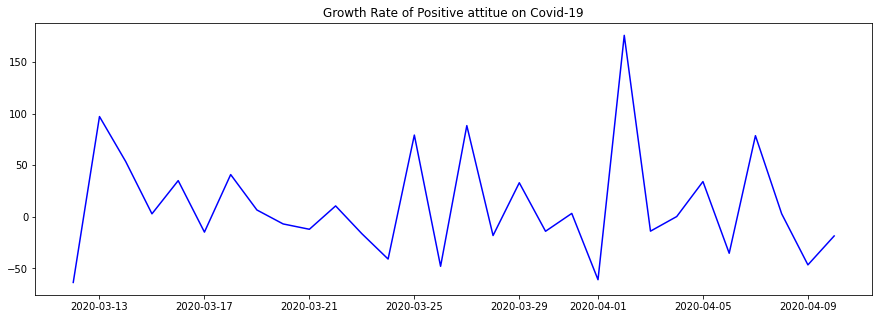

In [35]:
# Line Chart - Variation Trend    ---- Positive
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

pos_trend_lst = []
for i in range(1, len(pos_daily)):
    gnumbers = ((pos_daily[i] - pos_daily[i-1]) * 100.0 / pos_daily[i-1])
    pos_trend_lst.append(gnumbers)

dates_list = []
for date in range(1, len(dates)):
    dates_list.append(datetime.strptime(dates[date], '%m/%d/%Y'))

plt.figure(figsize=(15, 5))
plt.title('Growth Rate of Positive attitue on Covid-19')
plt.plot(dates_list, pos_trend_lst, color='blue');

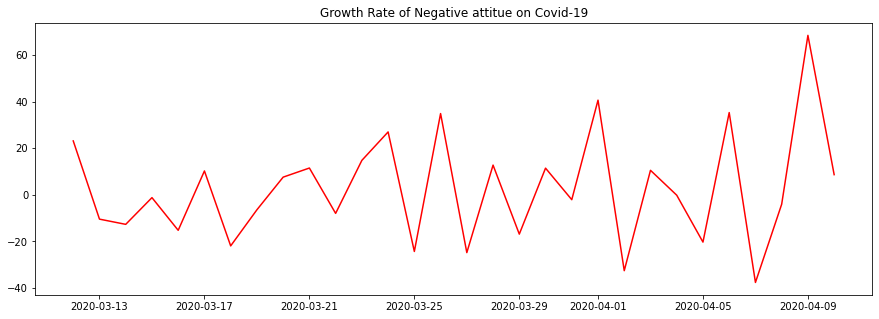

In [36]:
# Line Chart - Variation Trend    ---- Negative
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

neg_trend_lst = []
for i in range(1, len(neg_daily)):
    gnumbers = ((neg_daily[i] - neg_daily[i-1]) * 100.0 / neg_daily[i-1])
    neg_trend_lst.append(gnumbers)

dates_list = []
for date in range(1, len(dates)):
    dates_list.append(datetime.strptime(dates[date], '%m/%d/%Y'))

plt.figure(figsize=(15, 5))
plt.title('Growth Rate of Negative attitue on Covid-19')
plt.plot(dates_list, neg_trend_lst, color='red');